In [83]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt
import time

mydir='D:\\HighEnergyAstro\\SHAO, Wenbiao H\\radiativeDephasing\\'

In [88]:
## KRZ wave

#计算能量etc
#赤道面 非Kerr 轨道
p=6;
ecc=0.5
d1=0.2; d2=0;d3=0;
spin=0.5;M=1e6

rmax = p / (1 - ecc);
rmin = p / (1 + ecc);
r0 = rmax;
th0=np.pi/2.0
invgmax=metric_KRZ_inverse(spin, d1, rmax, th0);
invgmin=metric_KRZ_inverse(spin, d1, rmin, th0);


EoverL = ((invgmax[3][0] - invgmin[3][0]) + sqrt((invgmax[3][0] - invgmin[3][0]) *(invgmax[3][0] - invgmin[3][0]) - (invgmax[0][0] - invgmin[0][0])*(invgmax[3][3] - invgmin[3][3]))) / (invgmax[0][0] - invgmin[0][0]);
Lz = sqrt((invgmax[3][0] - invgmin[3][0]) / (EoverL*EoverL*(invgmin[3][0] * invgmax[0][0] - invgmax[3][0] * invgmin[0][0]) + (invgmin[3][0] * invgmax[3][3] - invgmax[3][0] * invgmin[3][3])));

E = EoverL*Lz;
iota=0;Q=0;
print(E,Lz)
print('krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;'%(d1,spin,p,ecc,iota,E,Lz,Q))

0.943852118061 3.04312647962
krz_d[1]= 0.200000; spin = 0.500000;current_p = 6.000000;current_e = 0.500000;current_iota = 0.000000;
E=0.9438521181;Lz=3.0431264796; Q=0.0000000000;


In [89]:
orbfilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,E,Lz,Q,d1,d2,d3)
wavefilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,E,Lz,Q,d1,d2,d3)

In [90]:
#reading
t_sec,wave_p,wave_c=np.loadtxt(wavefilename1,unpack=True)
index, myt_sec, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename1,unpack=True)

In [91]:
if wave_p[0]==0:
    [t_sec,wave]=getwave(orbfilename1)
    wave_p=np.real(wave)

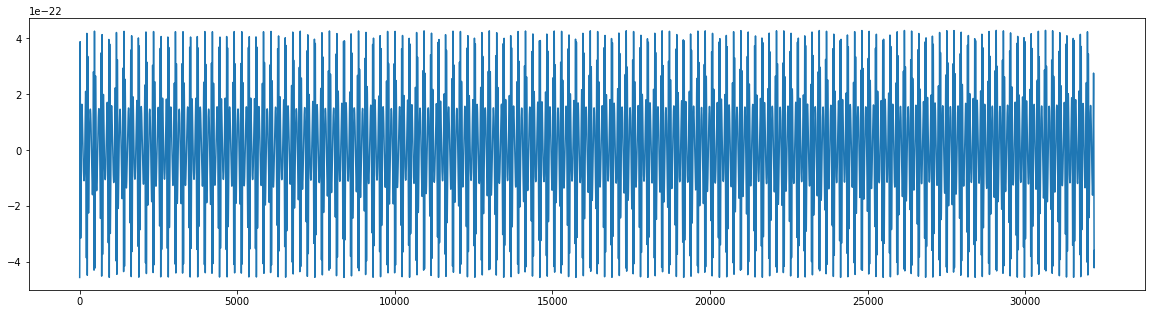

In [94]:
#plotting KRZ wave
fig=plt.figure()
plt.plot(t,wave_p)
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
#plt.xlim(0,2e3)

In [95]:
## getting Kerr wave

# Corresponding confusion ecc and p

e_kerr=0.409248
p_kerr=6.481170

[Ekerr,Lzkerr,Q]=getELQ(e_kerr,p_kerr,iota,spin)
d1=0;d2=0;d3=0;
print('krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;'%(0,spin,p_kerr,e_kerr,iota,Ekerr,Lzkerr,Q))

krz_d[1]= 0.000000; spin = 0.500000;current_p = 6.481170;current_e = 0.409248;current_iota = 0.000000;
E=0.9433702031;Lz=3.1600166914; Q=0.0000000000;


In [96]:
orbfilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'\
    %(M,spin,Ekerr,Lzkerr,Q,d1,d2,d3)
wavefilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'\
    %(M,spin,Ekerr,Lzkerr,Q,d1,d2,d3)

In [112]:
#reading Kerr
t_sec2,wave_p2,wave_c2=np.loadtxt(wavefilename2,unpack=True)
index, myt_sec, tau,t2,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename2,unpack=True)

In [113]:
if wave_p2[0]==0:
    [t_sec2,wave2]=getwave(orbfilename2)
    wave_p2=np.real(wave2)

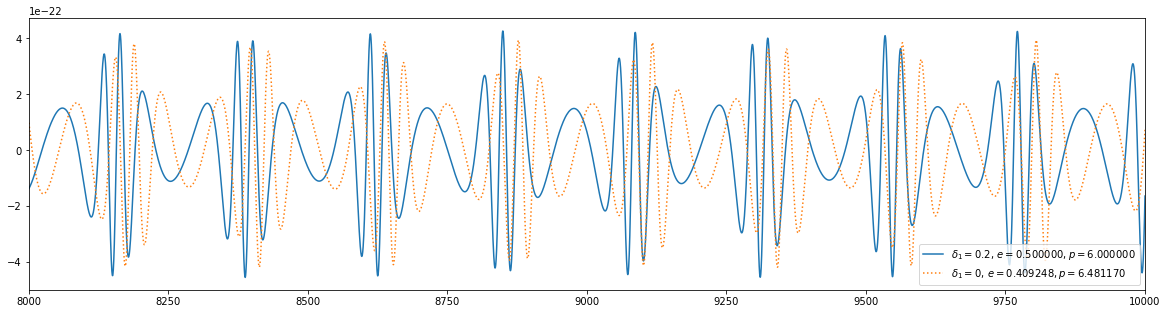

In [115]:
#comparing wave
fig=plt.figure()
plt.plot(t,wave_p,label='$\delta_1=0.2,\, e=%f, p=%f$'%(ecc,p))
plt.plot(t2,wave_p2,':',label='$\delta_1=0,\, e=%f, p=%f$'%(e_kerr,p_kerr))
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
plt.xlim(8e3,10e3)
plt.legend()
plt.savefig(mydir+'Evo_2D_%d.pdf'%time.time())

In [120]:
tottimelist=np.arange(500,10000,500)
olplist=[]
for tottime in tottimelist:
    olplist.append(overlap([t[np.where(t<tottime)],wave_p[np.where(t<tottime)]+1j*wave_c[np.where(t<tottime)]],
        [t2[np.where(t<tottime)],wave_p2[np.where(t<tottime)]+1j*wave_c2[np.where(t<tottime)]]))

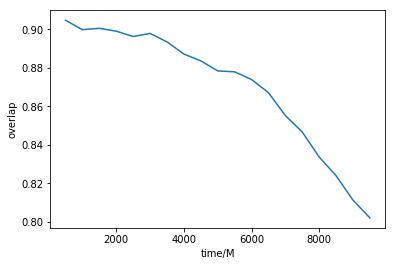

In [121]:
plt.plot(tottimelist,olplist)
plt.xlabel('time/M')
plt.ylabel('overlap')
plt.savefig(mydir+'olp_2D_ep_%d.pdf'%time.time())